## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# stats
from scipy.stats import norm, kstest, shapiro
from scipy import stats

%matplotlib inline

In [54]:
flights = pd.read_csv("Data/flights_processed.csv")

In [55]:
passengers = pd.read_csv("Data/passengers_data.csv")

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


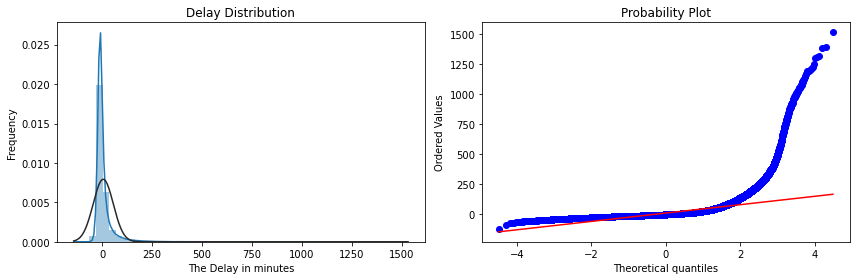

In [56]:
# Delays before Outlier removal
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(flights['arr_delay'], fit= norm)
plt.title("Delay Distribution")
plt.xlabel("The Delay in minutes")
plt.ylabel("Frequency")

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(flights['arr_delay'], plot=plt)

plt.tight_layout()
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


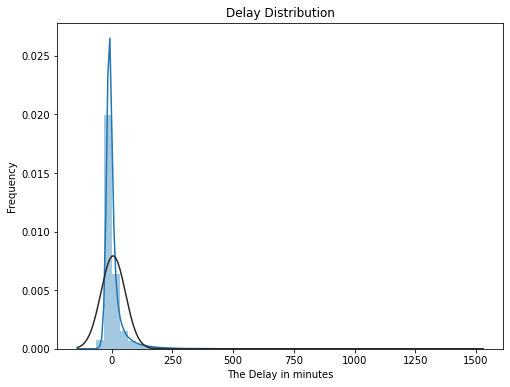

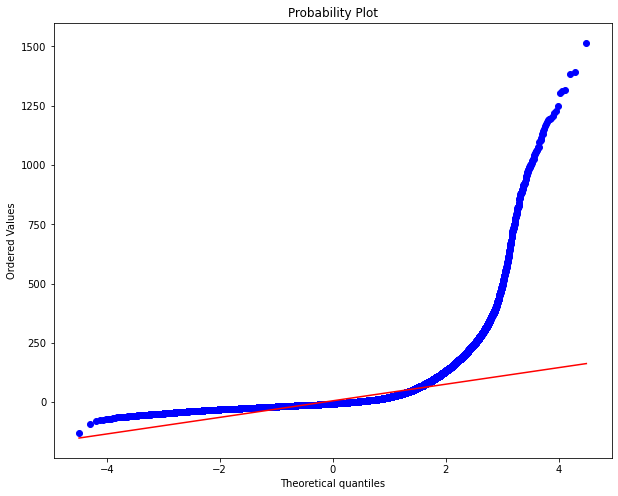

In [57]:
# histogram
fig = plt.figure(figsize = (8,6))
sns.distplot(flights['arr_delay'], fit= norm)
plt.title("Delay Distribution")
plt.xlabel("The Delay in minutes")
plt.ylabel("Frequency")

fig = plt.figure(figsize = (10,8))
res = stats.probplot(flights['arr_delay'], plot= plt)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

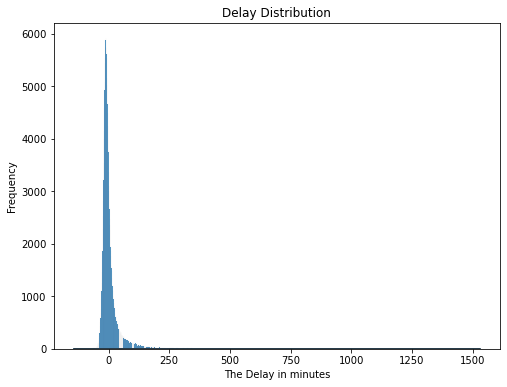

In [58]:
# histogram
fig = plt.figure(figsize = (8,6))
sns.distplot(flights['arr_delay'], fit= norm)
sns.histplot(flights, x = 'arr_delay')
plt.title("Delay Distribution")
plt.xlabel("The Delay in minutes")
plt.ylabel("Frequency")

In [59]:
mean, median, mode = flights.arr_delay.mean(), flights.arr_delay.median(), flights.arr_delay.mode()
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")

Mean: 5.62143863014817
Median: -6.0
Mode: 0   -10.0
dtype: float64


In [60]:
print(kstest(flights.arr_delay, 'norm'))
print(shapiro(flights.arr_delay))

KstestResult(statistic=0.586790053365507, pvalue=0.0)
ShapiroResult(statistic=0.4843597412109375, pvalue=0.0)


F:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
shapiro(flights.arr_delay)

ShapiroResult(statistic=0.4843597412109375, pvalue=0.0)

In [62]:
# the delay is not from Normal distribution, and that mean of the delay is not 0 (positive skew with mean=5.62)

In [63]:
# Outlier removal using IQR
Q1 = flights['arr_delay'].quantile(0.25)
Q3 = flights['arr_delay'].quantile(0.75)
IQR = Q3 - Q1

In [64]:
flights_IQR = flights.loc[(flights['arr_delay'] >= 
                           (Q1 - 1.5*IQR)) & (flights['arr_delay'] <= Q3 + 1.5*IQR)]

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


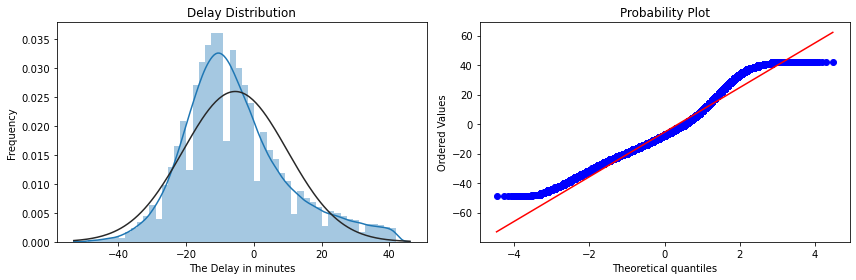

In [65]:
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(flights_IQR['arr_delay'], fit= norm)
plt.title("Delay Distribution")
plt.xlabel("The Delay in minutes")
plt.ylabel("Frequency")

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(flights_IQR['arr_delay'], plot=plt)

plt.tight_layout()
plt.show()

In [66]:
mean, median, mode = flights_IQR.arr_delay.mean(), flights_IQR.arr_delay.median(), flights_IQR.arr_delay.mode()
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")

Mean: -5.466227978749176
Median: -8.0
Mode: 0   -10.0
dtype: float64


In [67]:
print(kstest(flights_IQR.arr_delay, 'norm'))
print(shapiro(flights_IQR.arr_delay))

KstestResult(statistic=0.6492592878231997, pvalue=0.0)
ShapiroResult(statistic=0.9661296010017395, pvalue=0.0)


F:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
# the outliers were reomoved using IQR but  P value is still 0
# Lets try another way to remove the outliers

In [69]:
#Outlier Treatment using Z Score
flights_Z_Score = flights.copy()
Z_Score = flights_Z_Score.arr_delay[(np.abs(stats.zscore(flights_Z_Score.arr_delay)) < 2)]
flights_Z_Score['arr_delay_Z_Score'] = Z_Score
flights_Z_Score['arr_delay_Z_Score'] = flights_Z_Score['arr_delay_Z_Score'].fillna(0)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


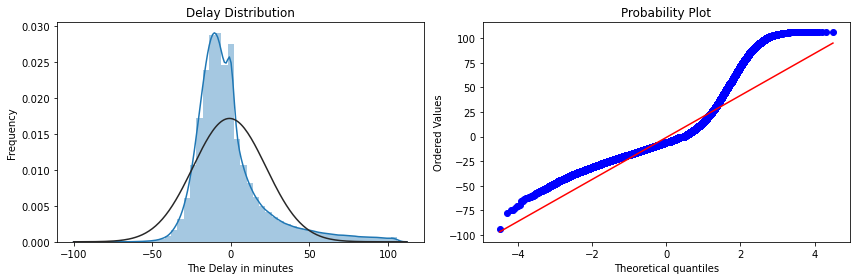

In [70]:
plt.figure(figsize=(12, 4))

# Distribution Plot
plt.subplot(1, 2, 1)
sns.distplot(flights_Z_Score['arr_delay_Z_Score'], fit= norm)
plt.title("Delay Distribution")
plt.xlabel("The Delay in minutes")
plt.ylabel("Frequency")

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(flights_Z_Score['arr_delay_Z_Score'], plot=plt)

plt.tight_layout()
plt.show()

In [71]:
mean, median, mode = flights_Z_Score['arr_delay_Z_Score'].mean(), flights_Z_Score['arr_delay_Z_Score'].median(), flights_Z_Score['arr_delay_Z_Score'].mode()
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")
print(kstest(flights_Z_Score['arr_delay_Z_Score'], 'norm'))
print(shapiro(flights_Z_Score['arr_delay_Z_Score']))

Mean: -0.8793114004653251
Median: -6.0
Mode: 0    0.0
dtype: float64
KstestResult(statistic=0.5867849511164357, pvalue=0.0)
ShapiroResult(statistic=0.8471993803977966, pvalue=0.0)


F:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [72]:
# the delay is not from Normal distribution, and that mean of the delay is not 0 (positive skew)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [73]:
pd.DatetimeIndex(flights['fl_date']).month

Int64Index([10,  7,  5, 12,  4,  3,  5,  7, 11,  6,
            ...
             8, 12,  1,  6,  6,  7,  4,  9,  6, 11],
           dtype='int64', name='fl_date', length=195992)

In [74]:
# Add separate columns for year, month, day of month, and day of week
#flights['year'] = pd.to_datetime(flights['fl_date'],format='%Y-%m-%d')
flights['year'] = pd.DatetimeIndex(flights['fl_date']).year
flights['month'] = pd.DatetimeIndex(flights['fl_date']).month
flights['day'] = pd.DatetimeIndex(flights['fl_date']).dayofweek

In [75]:
flights.head(2)

,fl_date,mkt_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day
0,2018-10-26,WN,N7828A,MDW,"Chicago, IL",STL,"St. Louis, MO",1920,1928.0,8.0,...,44.0,251.0,0.0,0.0,0.0,0.0,0.0,2018,10,4
1,2018-07-16,UA,N14219,CLE,"Cleveland, OH",IAD,"Washington, DC",600,559.0,-1.0,...,48.0,288.0,0.0,0.0,0.0,0.0,0.0,2018,7,0


In [76]:
delay_per_month=flights.groupby(['month'])['arr_delay'].count().reset_index()
delay_per_month

,month,arr_delay
0,1,15370
1,2,14104
2,3,16391
3,4,16089
4,5,16653
5,6,16875
6,7,17347
7,8,17210
8,9,16101
9,10,16993


In [77]:
delay_average_per_month=flights.groupby(['month'])['arr_delay'].mean().reset_index()
delay_average_per_month  

,month,arr_delay
0,1,3.937476
1,2,6.633650
2,3,2.414679
3,4,4.884766
4,5,6.564943
5,6,11.552889
6,7,8.808324
7,8,8.517722
8,9,1.885597
9,10,2.851704


Text(0, 0.5, 'Delay Average (Minutes)')

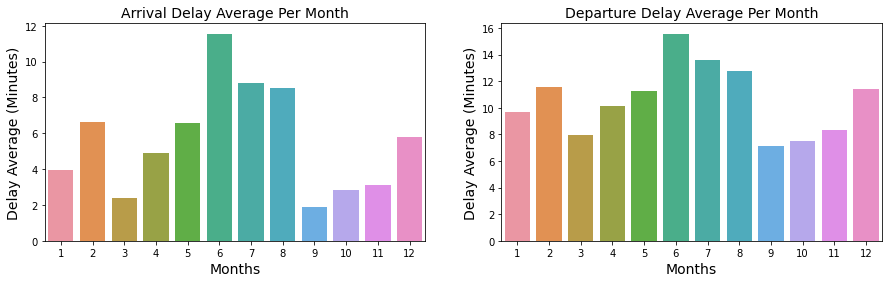

In [78]:
# Arrival and Departure Delay Averages Per Month
Arrival_Delay_Average = flights.groupby('month')['arr_delay'].mean()
Departure_Delay_Average = flights.groupby('month')['dep_delay'].mean()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)

sns.barplot(x=Arrival_Delay_Average.index, y=Arrival_Delay_Average.values)
plt.title("Arrival Delay Average Per Month", size = 14)
plt.xlabel("Months", size = 14)
plt.ylabel("Delay Average (Minutes)", size = 14)

plt.subplot(1, 2, 2)

sns.barplot(x=Departure_Delay_Average.index, y=Departure_Delay_Average.values)
plt.title("Departure Delay Average Per Month", size = 14)
plt.xlabel("Months", size = 14)
plt.ylabel("Delay Average (Minutes)", size = 14)

In [79]:
# There are monthly delay different during the year based on the calculated counts and averages.
# Months from June to August have the highest monthly delay for both the arrival and depature

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [80]:
data = flights[['taxi_in', 'taxi_out', 'crs_dep_time', 'crs_arr_time']]

No handles with labels found to put in legend.


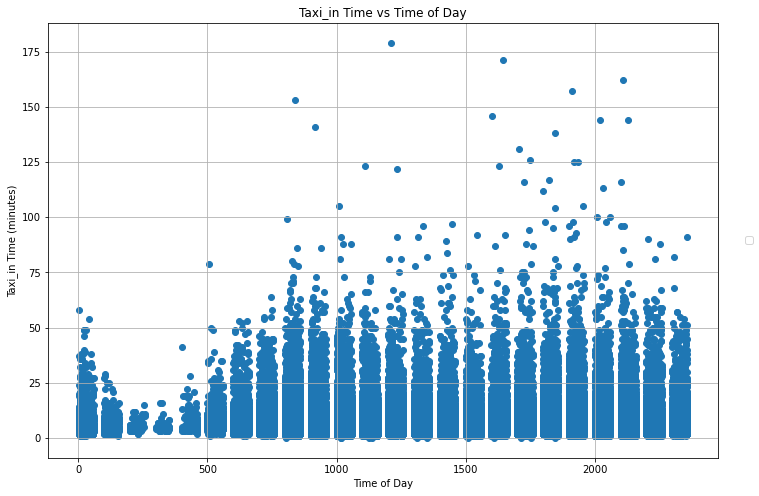

In [81]:
# ARRIVAL TIME VS TAXI TIME

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(data['crs_arr_time'],
            data['taxi_in'],
            )


plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('Time of Day')
plt.ylabel('Taxi_in Time (minutes)')
plt.title('Taxi_in Time vs Time of Day')
plt.grid()
plt.show()

Above visualisation shows significantly lower taxi_in times earlier on in the day, implies addition of taxi_in times as a feature could improve model accuracy. Addition of taxi_out times could also be included but see task 5 logic: airlines are able to compensate by lowering delays during flight.

No handles with labels found to put in legend.


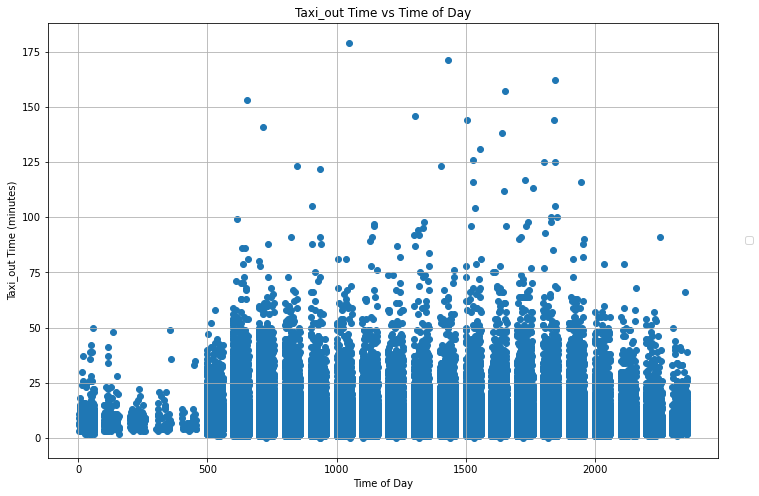

In [82]:
# Departure TIME VS TAXI TIME

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(data['crs_dep_time'],
            data['taxi_in'],
            )


plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('Time of Day')
plt.ylabel('Taxi_out Time (minutes)')
plt.title('Taxi_out Time vs Time of Day')
plt.grid()
plt.show()

Above visualisation shows significantly lower taxi_out times earlier on in the day, implies addition of taxi_out times as a feature could improve model accuracy.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [83]:
# Getting the Arrival and Departur delays
total_arr = flights[flights['arr_delay'] > 0]
arr_dep = total_arr[total_arr['dep_delay'] > 0]

late_arr_dep = arr_dep['dep_delay'].count()
arr_count = total_arr['arr_delay'].count()
percent_late_arr  = arr_dep['dep_delay'].count() / total_arr['arr_delay'].count()
percent_early_arr = 1 - late_arr_dep / arr_count

print('Total late arrivals: ',arr_count)
print('Late arrivals that departed late: ', late_arr_dep )
print('Percentage of late arrivals that departed late: ', percent_late_arr*100,'%')
print('Percentage of late arrivals that on time or early: ', percent_early_arr*100,'%')

Total late arrivals:  68802
Late arrivals that departed late:  49137
Percentage of late arrivals that departed late:  71.41798203540594 %
Percentage of late arrivals that on time or early:  28.58201796459405 %


Total late arrivals: 68802\ Late arrivals that departed late: 49137\ Percentage of late arrivals that departed late: 71.42 %\ Percentage of late arrivals that on time or early: 28.58 %

In [87]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'tail_num', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'month', 'day'],
      dtype='object')

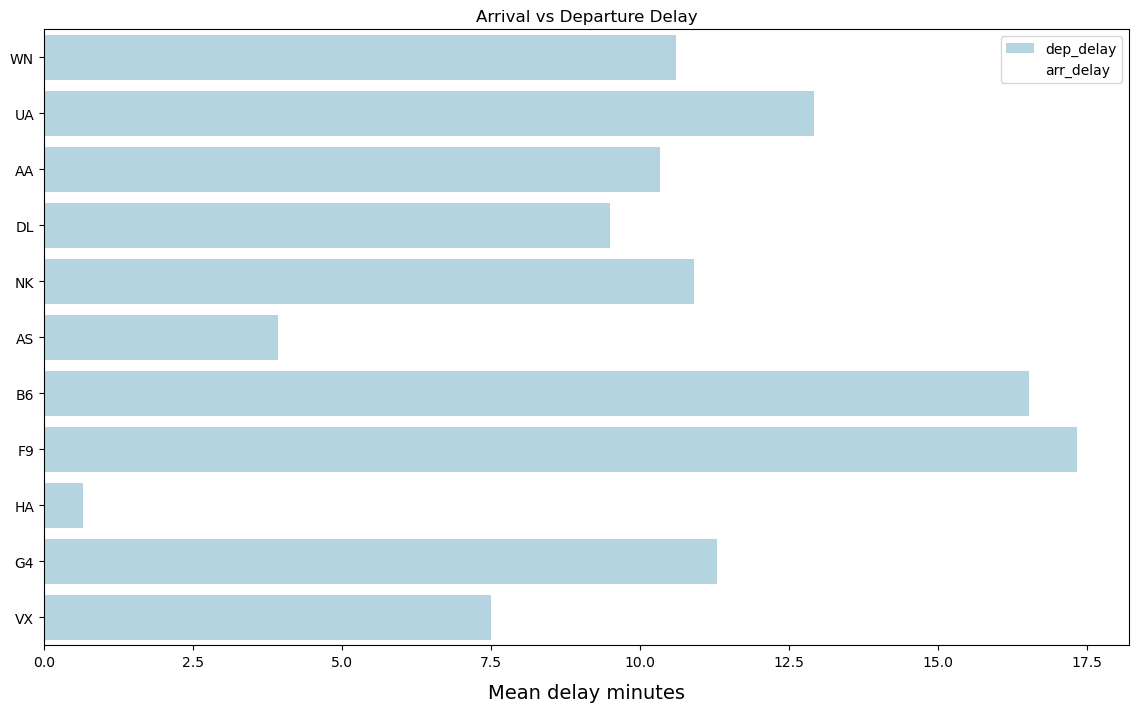

In [94]:
# Visualization by Arrival and Departur delays by Airlines

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(14,8))
ax = sns.barplot(x="dep_delay", y="mkt_unique_carrier", label= 'dep_delay', data=flights, color="lightblue", ci=None)
ax = sns.barplot(x="arr_delay", y="mkt_unique_carrier", label= 'arr_delay', data=flights, color="black", hatch = ')))',
                 alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Arrival vs Departure Delay')
plt.xlabel('Mean delay minutes', fontsize=14, labelpad=10);
ax.legend(loc='upper right')
plt.show()

#### **Task 6**: How many states cover 50% of US air traffic? 

In [88]:
# The necessary columns
des_origin = flights.filter(['origin_city_name', 'dest_city_name', 'fl_date'])
des_origin.head() 

,origin_city_name,dest_city_name,fl_date
0,"Chicago, IL","St. Louis, MO",2018-10-26
1,"Cleveland, OH","Washington, DC",2018-07-16
2,"Dallas/Fort Worth, TX","Fort Smith, AR",2018-05-18
3,"Detroit, MI","Omaha, NE",2018-12-13
4,"Tampa, FL","Cincinnati, OH",2019-04-07


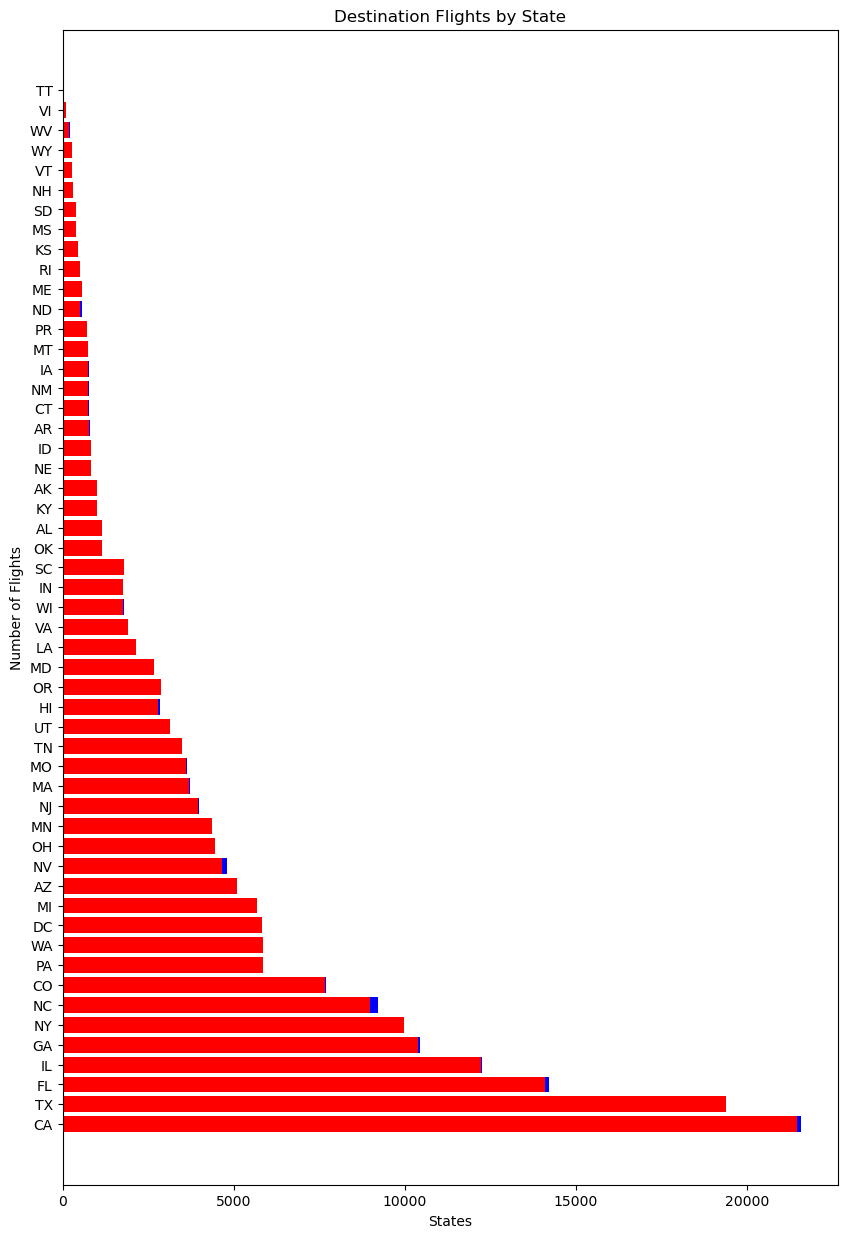

In [89]:
# Visualization of Traffic By State

#Getting the states
des_origin['origin_state'] = des_origin['origin_city_name'].apply(lambda x: x.split(', ')[1])
des_origin['dest_state'] = des_origin['dest_city_name'].apply(lambda x: x.split(', ')[1])

# Caounting the data by state for Origin 
origin = des_origin.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)

# Barplot fr origin
plt.barh(origin.index,origin.values,  color='blue')
plt.xlabel("States")
plt.ylabel("Number of Flights")
plt.title("Origin Flights by State")
fig = plt.gcf()
fig.set_size_inches(10, 15)

# Caounting the data by state for Destination 
destination = des_origin.groupby('dest_state')['fl_date'].count().sort_values(ascending=False)

# Barplot for Destination
plt.barh(destination.index,destination.values,  color='red')
plt.xlabel("States")
plt.ylabel("Number of Flights")
plt.title("Destination Flights by State")
fig = plt.gcf()
fig.set_size_inches(10, 15)

plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [95]:
# Necessary columns
flightspeed_data = flights.filter(['dep_delay', 'distance', 'air_time'])

In [98]:
flightspeed_data['speed'] = flightspeed_data['distance']/(flightspeed_data['air_time']/60)
delayed = flightspeed_data[flightspeed_data['dep_delay'] > 0]
none_delayed = flightspeed_data[flightspeed_data['dep_delay'] <= 0]

average_delay = delayed['speed'].median()
average_nondelay = none_delayed['speed'].median()

print(f'Average Speed of Delayed Flights : {average_delay}')
print(f'Average Speed of Non-Delayed Flights : {average_nondelay}')

Average Speed of Delayed Flights : 413.1958762886598
Average Speed of Non-Delayed Flights : 402.22222222222223


Text(0, 0.5, 'Average Speed')

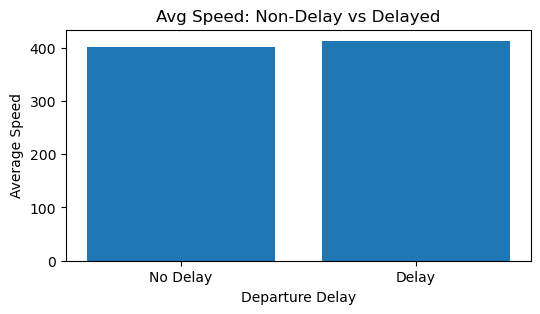

In [103]:
# Visualiztion
fig = plt.figure(figsize=(6,3))
plt.bar(['No Delay', 'Delay'],[average_nondelay,average_delay])
plt.title('Avg Speed: Non-Delay vs Delayed')
plt.xlabel('Departure Delay')
plt.ylabel('Average Speed')

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
flights_by_haul = flights_sample[['dep_time', 'air_time']].dropna().reset_index(drop=True)
flights_by_haul['dep_time'] = flights_by_haul['dep_time'].astype(int).astype(str)
flights_by_haul

In [12]:
haul_flights = flights[['crs_arr_time','crs_dep_time']].reset_index(drop=True)

In [13]:
haul_flights.head()

,crs_arr_time,crs_dep_time
0,2025,1920
1,706,600
2,2331,2230
3,1008,830
4,1359,1151


In [14]:
haul_flights['arr_time_hr']=haul_flights['crs_arr_time']/60

In [15]:
haul_flights['crs_arr_time'] = haul_flights['crs_arr_time'].astype(int).astype(str)

In [16]:
haul_flights.head()

,crs_arr_time,crs_dep_time,arr_time_hr
0,2025,1920,33.750000
1,706,600,11.766667
2,2331,2230,38.850000
3,1008,830,16.800000
4,1359,1151,22.650000


In [17]:
haul_flights.describe()

,crs_dep_time,arr_time_hr
count,195992.000000,195992.000000
mean,1329.133556,24.737883
std,490.306267,8.618944
min,1.000000,0.016667
25%,914.000000,17.650000
50%,1320.000000,25.183333
75%,1735.000000,31.966667
max,2359.000000,39.316667


In [18]:
# We can assign different haul type based on air time as follows:
# Short haul flight: 0-3 hrs
# Medium haul flight: 3-6 hr.
# Long haul flight: more than 6 hrs
filter = [(haul_flights['arr_time_hr'].between(0,3)),(haul_flights['arr_time_hr'].between(3,6)),(haul_flights['arr_time_hr']>6)]
hauls=['low', 'medium', 'long']

haul_flights['haul_type']=np.select(filter,hauls)

In [28]:
haul_flights['dep_hour']=(haul_flights['crs_dep_time']/100).astype('int')

In [29]:
haul_flights.sample(5)


,crs_arr_time,crs_dep_time,arr_time_hr,haul_type,dep_hour
65015,1515,1400,25.250000,long,14
150915,1116,800,18.600000,long,8
75428,2209,2005,36.816667,long,20
178591,1219,1146,20.316667,long,11
29845,1130,941,18.833333,long,9


In [37]:
haul_flights.haul_type.value_counts()

long      192541
low         3306
medium       145
Name: haul_type, dtype: int64

Text(0, 0.5, 'Count')

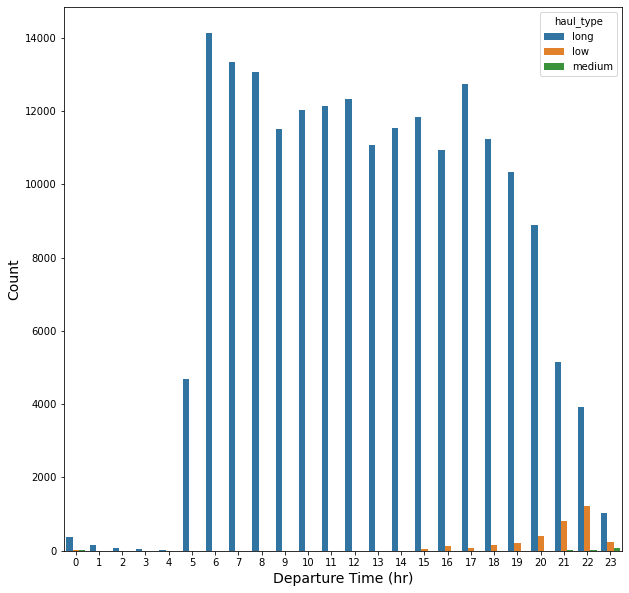

In [39]:
plt.figure(figsize=(10, 10))
sns.countplot(data=haul_flights, x='dep_hour', hue='haul_type')

#plt.title("Arrival Delay Average Per Month", size = 14)
plt.xlabel("Departure Time (hr)", size = 14)
plt.ylabel("Count", size = 14)

In [43]:
m=haul_flights[haul_flights.haul_type=='medium']
l=haul_flights[haul_flights.haul_type=='long']
s=haul_flights[haul_flights.haul_type=='low']

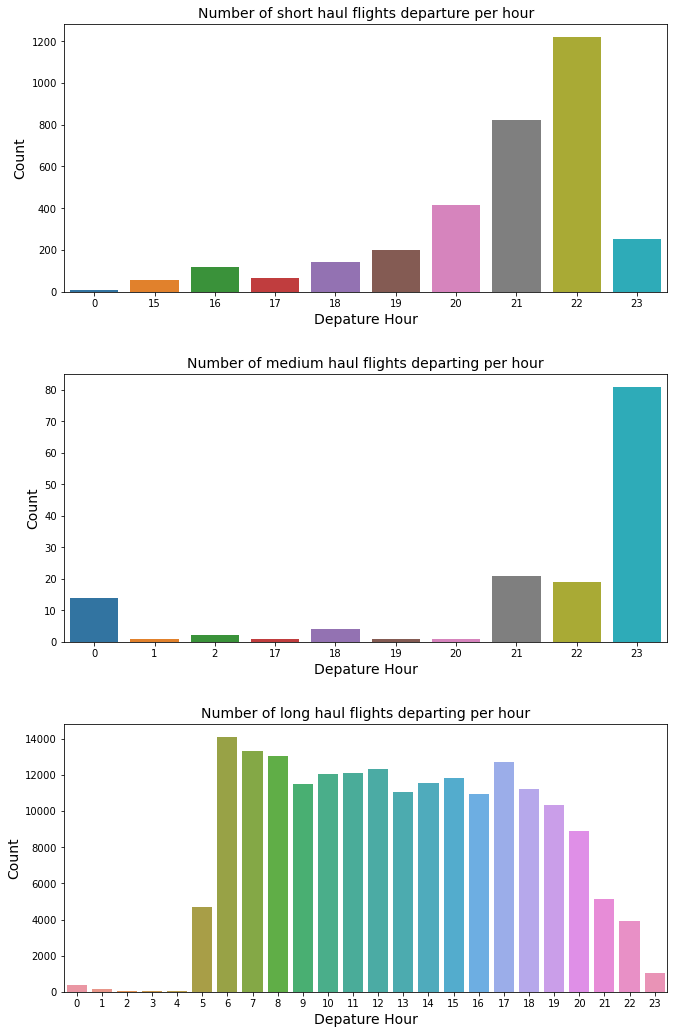

In [52]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)

sns.countplot(data=s, x='dep_hour')
plt.title("Number of short haul flights departure per hour", size = 14)
plt.xlabel("Depature Hour", size = 14)
plt.ylabel("Count", size = 14)

plt.subplot(3, 1, 2)

sns.countplot(data=m, x='dep_hour')
plt.title("Number of medium haul flights departing per hour", size = 14)
plt.xlabel("Depature Hour", size = 14)
plt.ylabel("Count", size = 14)

plt.subplot(3, 1, 3)
sns.countplot(data=l, x='dep_hour')
plt.title("Number of long haul flights departing per hour", size = 14)
plt.xlabel("Depature Hour", size = 14)
plt.ylabel("Count", size = 14)

plt.tight_layout(pad=3.0)

In [ ]:
# Long haul flights mostly depart from 6-7 am
# Medium haul flights mostly depart at 23 pm
# Short haul flights mostly depart from 21-22 pm

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [157]:
origin_flights = flights.filter(['origin', 'fl_date'])
filter = (flights['origin'] == 'ATL') | (flights['origin'] == 'LAX')|\
(flights['origin'] == 'ORD')| (flights['origin'] == 'DFW')|\
(flights['origin'] == 'DEN')| (flights['origin'] == 'JFK')|\
(flights['origin'] == 'SFO')| (flights['origin'] == 'LAS')|\
(flights['origin'] == 'SEA')| (flights['origin'] == 'MCO')

flights_name = flights[filter]
flights_name = flights_name.groupby('origin')['fl_date'].count().sort_values(ascending=False).head(10)
flights_name

origin
ATL    9768
ORD    9587
DFW    7237
DEN    6863
LAX    6241
SEA    4754
SFO    4383
LAS    4219
MCO    3500
JFK    3090
Name: fl_date, dtype: int64

In [163]:
#passengers.groupby('origin')['passengers'].sum().sort_values(ascending=False)
passengers.groupby('origin')['passengers'].sum().reset_index()

,origin,passengers
0,05A,87.0
1,06A,8.0
2,09A,3.0
3,1G4,12501.0
4,1TN,9.0
...,...,...
1620,ZXB,1.0
1621,ZXF,0.0
1622,ZXH,14.0
1623,ZXM,498.0


In [174]:
passengers_origin = passengers.groupby('origin')['passengers'].sum().reset_index().rename({'passengers': 'total_passengers'}, axis=1)
passengers_origin = passengers_origin.sort_values(by='total_passengers', ascending=False).head(10)

Text(0, 0.5, 'Flights')

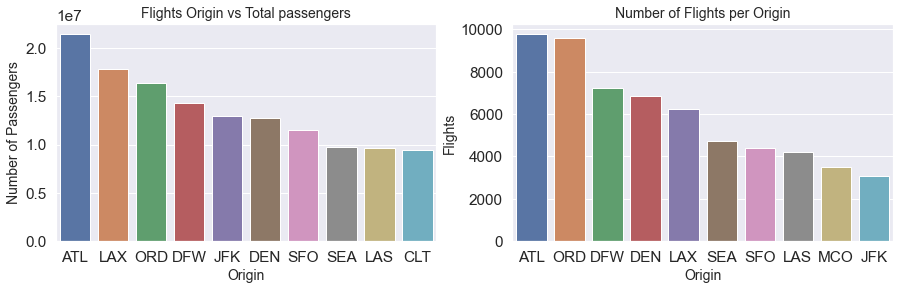

In [181]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)

sns.barplot(x='origin', y='total_passengers', data=passengers_origin)
plt.title("Flights Origin vs Total passengers", size = 14)
plt.xlabel("Origin", size = 14)
plt.ylabel("Number of Passengers", size = 14)

plt.subplot(1, 2, 2)

sns.barplot(x=flights_name.index, y=flights_name.values)
plt.title("Number of Flights per Origin", size = 14)
plt.xlabel("Origin", size = 14)
plt.ylabel("Flights", size = 14)

In [183]:
# origin_countries
print(passengers.origin_country.unique().tolist())

['US', 'MX', 'TT', 'GB', 'CA', 'CL', 'BZ', 'KY', 'FR', 'BE', 'ZA', 'IL', 'AT', 'CO', 'BS', 'AW', 'NL', 'AE', 'DO', 'RU', 'TR', 'ES', 'CN', 'NO', 'CH', 'DK', 'VE', 'HK', 'DE', 'CU', 'IE', 'AG', 'CW', 'JP', 'KR', 'KN', 'IN', 'JM', 'BR', 'GT', 'IS', 'IT', 'TW', 'NI', 'FJ', 'SV', 'HT', 'SA', 'AU', 'CR', 'GH', 'HN', 'GD', 'BM', 'QA', 'PA', 'BB', 'TC', 'SE', 'SG', 'SX', 'GY', 'PH', 'NZ', 'AZ', 'GR', 'GP', 'KW', 'PT', 'EC', 'EG', 'VG', 'AR', 'SR', 'LU', 'VN', 'CZ', 'LC', 'FM', 'PF', 'KE', 'PE', 'BH', 'BL', 'MH', 'AI', 'FI', 'ET', 'HU', 'MA', 'DM', 'WS', 'SN', 'CK', 'LK', 'AO', 'BQ', 'MQ', 'PW', 'VC', 'UA', 'PG', 'PL', 'MT', 'CV', 'KI', 'LV', 'NG', 'RS', 'UZ', 'JO', 'PY', 'UY', 'TH', 'MY', 'PK', 'GI', 'TO', 'RO', 'BO', 'GE', 'BG', 'DZ', 'NC', 'GF']


In [186]:
# pull out data for USA

passengers_des = passengers[(passengers.dest_country=='US')]
passengers_origin = passengers[(passengers.origin_country=='US')]
dep_airport = passengers_origin.groupby(['origin'])['passengers'].sum().reset_index()
arr_airport = passengers_des.groupby(['dest'])['passengers'].sum().reset_index()

In [187]:
airport_total=dep_airport.merge(arr_airport, left_on='origin', right_on='dest', how='outer')

In [188]:
airport_total

,origin,passengers_x,dest,passengers_y
0,05A,87.0,05A,78.0
1,06A,8.0,NaN,NaN
2,09A,3.0,NaN,NaN
3,1G4,12501.0,1G4,28788.0
4,1TN,9.0,NaN,NaN
...,...,...,...,...
1297,NaN,NaN,WY1,5.0
1298,NaN,NaN,XSM,2.0
1299,NaN,NaN,XXU,0.0
1300,NaN,NaN,ZXC,0.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
# average monthly delay per air carrier

In [105]:
average_monthly_delay = flights.\
groupby(['year', 'mkt_unique_carrier', 'month'])[['dep_delay', 'arr_delay']].\
sum().reset_index()\
.rename(columns={'dep_delay': 'monthly_dep_delay', 'arr_delay': 'monthly_arr_delay'})
average_monthly_delay.head()

,year,mkt_unique_carrier,month,monthly_dep_delay,monthly_arr_delay
0,2018,AA,1,17282.0,8053.0
1,2018,AA,2,15624.0,8019.0
2,2018,AA,3,12606.0,2026.0
3,2018,AA,4,14037.0,5154.0
4,2018,AA,5,20562.0,11997.0


In [108]:
carriers = flights.mkt_unique_carrier.unique().tolist()

In [110]:
carriers

['WN', 'UA', 'AA', 'DL', 'NK', 'AS', 'B6', 'F9', 'HA', 'G4', 'VX']

In [124]:
flights.year.unique()

array([2018, 2019], dtype=int64)

In [125]:
## Given that there are different years, we are only interested in data from 2018, similar to what we have in our flights database
## and only airlines that we have worked with in flights dataset
passengers = passengers[passengers.year >= 2018]
passengers = passengers[passengers.unique_carrier.isin(carriers)]

In [126]:
passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
2,29.0,29.0,1258600.0,5075.0,4646.0,3161.0,0.0,255.0,1772.0,1300.0,...,US,United States,6,614,1,2019,12,1,F,DU
9,3.0,3.0,99851.0,378.0,321.0,104.0,0.0,1882.0,833.0,761.0,...,US,United States,6,612,1,2019,6,4,F,DU
15,1.0,1.0,36000.0,128.0,103.0,0.0,0.0,289.0,75.0,60.0,...,US,United States,6,698,1,2018,10,1,F,DU
16,2.0,2.0,234565.0,504.0,264.0,53367.0,1593.0,3677.0,961.0,904.0,...,US,United States,6,889,1,2019,1,8,F,IU
18,9.0,9.0,327600.0,1638.0,1454.0,0.0,0.0,978.0,1248.0,1140.0,...,US,United States,6,694,1,2019,7,2,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199966,6.0,6.0,223200.0,1116.0,873.0,0.0,0.0,483.0,625.0,450.0,...,US,United States,6,722,1,2019,4,1,F,DU
199967,56.0,57.0,2322390.0,9118.0,8429.0,3665.0,0.0,834.0,7678.0,6824.0,...,US,United States,6,614,1,2019,5,2,F,DU
199972,0.0,1.0,78430.0,211.0,195.0,28211.0,0.0,632.0,128.0,94.0,...,US,United States,6,626,1,2018,3,2,F,DU
199978,93.0,93.0,3217800.0,13299.0,11511.0,0.0,0.0,791.0,12174.0,9929.0,...,MX,Mexico,6,612,1,2019,12,2,F,IU


In [132]:

monthly_passengers = passengers.groupby(['year', 'unique_carrier', 'month'])[['passengers', 'distance']].sum().reset_index()
monthly_passengers.sample(10)

,year,unique_carrier,month,passengers,distance
21,2018,AS,10,219339.0,97846.0
49,2018,F9,2,97411.0,47787.0
38,2018,DL,3,1140510.0,376647.0
189,2019,G4,7,167963.0,94684.0
159,2019,DL,1,884533.0,336733.0
16,2018,AS,5,206166.0,85788.0
32,2018,B6,9,313690.0,61341.0
238,2019,WN,8,1178728.0,198577.0
86,2018,NK,3,217242.0,60842.0
90,2018,NK,7,180377.0,52112.0


In [122]:
fuel = pd.read_csv('Data/fuel_processed.csv')

In [130]:
fuel = fuel[fuel.year >= 2018]
fuel = fuel[fuel.unique_carrier.isin(carriers)]
monthly_fuel = fuel.groupby(['unique_carrier', 'year', 'month'])['total_gallons'].sum().reset_index()
monthly_fuel.sample(10)

,unique_carrier,year,month,total_gallons
73,DL,2018,11,263318204.0
38,AS,2019,6,64578199.0
49,B6,2018,8,76718254.0
137,HA,2018,12,23148471.0
124,G4,2019,8,16210186.0
152,NK,2018,6,36629663.0
100,F9,2019,5,24591649.0
58,B6,2019,5,74539278.0
136,HA,2018,11,21758910.0
134,HA,2018,9,23191353.0


In [133]:
monthly_fuel = monthly_fuel.rename(columns={'unique_carrier': 'mkt_unique_carrier'})


In [135]:
monthly_passengers = monthly_passengers.rename(columns={'unique_carrier': 'mkt_unique_carrier'})

In [137]:
# Merge the three dataframes
delay_fuel = pd.merge(monthly_delay, monthly_fuel, on=['mkt_unique_carrier', 'year', 'month'], how='left')
delay_fuel_passenger = pd.merge(delay_fuel, monthly_passengers, on=['mkt_unique_carrier', 'year', 'month'], how='left')

In [139]:
delay_fuel_passenger.head()

,year,mkt_unique_carrier,month,monthly_dep_delay,monthly_arr_delay,total_gallons,passengers,distance
0,2018,AA,1,17282.0,8053.0,283974071.0,1033097.0,268150.0
1,2018,AA,2,15624.0,8019.0,261946387.0,897440.0,251917.0
2,2018,AA,3,12606.0,2026.0,298906244.0,1239368.0,246793.0
3,2018,AA,4,14037.0,5154.0,297784292.0,900107.0,255346.0
4,2018,AA,5,20562.0,11997.0,318954880.0,1101553.0,252235.0


In [140]:
# Get fuel consumption per distance.
delay_fuel_passenger['fuel_cons_distance'] = (delay_fuel_passenger.total_gallons / delay_fuel_passenger.distance)

In [141]:
delay_fuel_passenger.head()

,year,mkt_unique_carrier,month,monthly_dep_delay,monthly_arr_delay,total_gallons,passengers,distance,fuel_cons_distance
0,2018,AA,1,17282.0,8053.0,283974071.0,1033097.0,268150.0,1059.012012
1,2018,AA,2,15624.0,8019.0,261946387.0,897440.0,251917.0,1039.812268
2,2018,AA,3,12606.0,2026.0,298906244.0,1239368.0,246793.0,1211.161759
3,2018,AA,4,14037.0,5154.0,297784292.0,900107.0,255346.0,1166.199165
4,2018,AA,5,20562.0,11997.0,318954880.0,1101553.0,252235.0,1264.514758


Text(0.5, 0, 'Fuel Consumption')

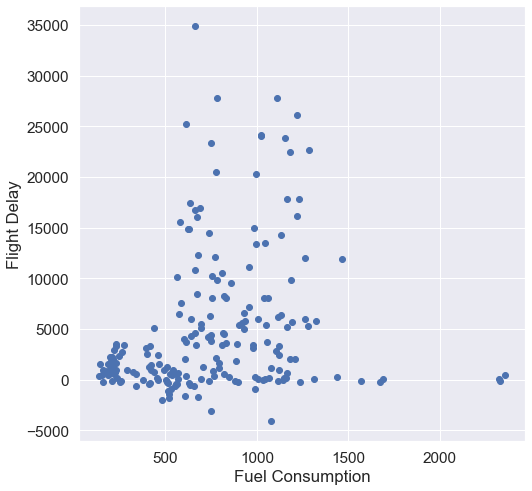

In [147]:
plt.figure(figsize=(8,8))
plt.scatter(delay_fuel_passenger.fuel_cons_distance, delay_fuel_passenger.monthly_arr_delay)
plt.ylabel('Flight Delay')
plt.xlabel('Fuel Consumption')

In [ ]:
# the bigger flight delays do not lead to bigger fuel comsumption